In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from progressbar import progressbar as pbar
from scipy import stats
from local.lib import histos2d as h2
%matplotlib inline

In [3]:
t, mu_s, sigma_s, mu = 0.03, 60, 6, .2
n_events = 1000

In [4]:
mb = h2.MLE_BinarizedSignalBg(n_events=n_events, params=[t, mu_s, sigma_s, mu])
hc = mb.hrvs_c(10000)
hb = mb.hrvs_b(10000)

# Hypothesis testing
## $H_0$: There is no signal ($\mu$=0), using unbinned data

we use the likelihood as test-statistic

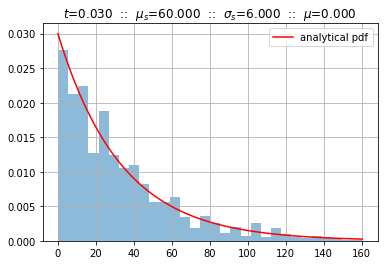

In [43]:
alpha=0.05
t, mu_s, sigma_s, mu = 0.03, 60, 6, 0

n = 4000 # number of experiments (each one with n_events) for empirical distributions

m_c0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu])
x = m_c0.rvs(n_events)
m_c0.plot_sample(x)

obtain a distribution of likelihoods given $H_0$

In [33]:
s_c0  = [m_c0.rvs(n_events) for _ in range(n)]
ts_c0 = np.r_[[m_c0.likelihood(i) for i in pbar(s_c0)]]
tslim_c0 = np.percentile(ts_c0, 100*(1-alpha))

100% (4000 of 4000) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


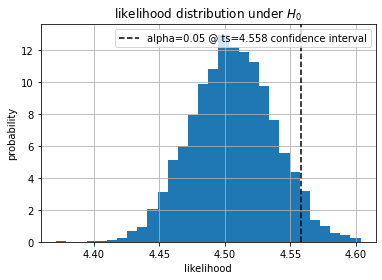

In [34]:
plt.hist(ts_c0, bins=30, density=True);
plt.title("likelihood distribution under $H_0$")
plt.grid(); plt.xlabel("likelihood"); plt.ylabel("probability");
plt.axvline(tslim_c0, color="black", ls="--", label="alpha=%.2f @ ts=%.3f confidence interval"%(alpha, tslim_c0))
plt.legend();

**assume our data sample is generated from an experiment where the actual $\mu \neq 0$**

In [35]:
real_mu = 0.1

In [36]:
m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, real_mu])
d_c1 = m_c1.rvs(n_events)

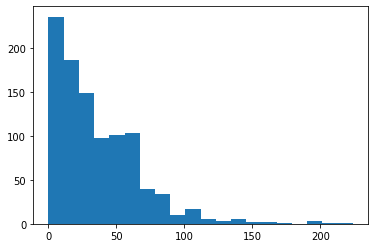

In [37]:
plt.hist(d_c1, bins=20);

the likelihood of that experiment given $H_0$

In [38]:
ts_d_c1 = m_c0.likelihood(d_c1).numpy()
print ("likelihood of d_c1 given H0 = %.2f"%ts_d_c1)
print ("H_0 rejected!!!" if ts_d_c1>tslim_c0 else "H_0 fail to reject")

likelihood of d_c1 given H0 = 4.57
H_0 rejected!!!


the probability of **correctly** rejecting $H_0$ $\rightarrow$ **Type II Error**

In [39]:
p_reject_c0 = np.mean([m_c0.likelihood(m_c1.rvs(n_events)).numpy() > tslim_c0 for _  in pbar(range(1000))])
p_reject_c0

100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.765

# What is the minimal $\mu$ for which the probability of a Type II error is $<\varepsilon$

In [40]:
eps = 0.01

In [41]:
mu_set = np.linspace(0.1,0.3,30)
p_rejects = []
for mu in mu_set:
    m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu])
    p_reject_c0 = np.mean([m_c0.likelihood(m_c1.rvs(n_events)).numpy() > tslim_c0 for _  in pbar(range(1000))])
    p_rejects.append(p_reject_c0)
p_rejects = np.r_[p_rejects]

100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |###################

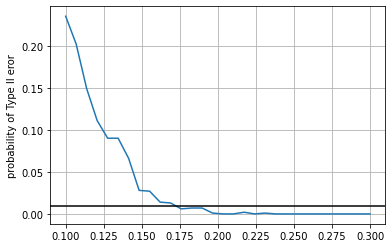

In [45]:
plt.plot(mu_set, 1-p_rejects)
plt.axhline(eps, color="black", label="minimum accepted")
plt.ylabel("probability of Type II eror")
plt.grid();

## another setup

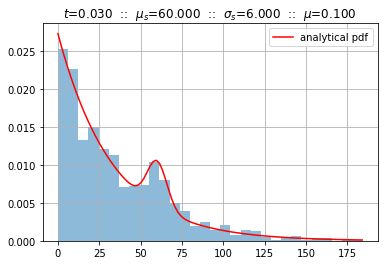

In [49]:
alpha=0.05
t, mu_s, sigma_s, mu = 0.03, 60, 6, 0.1

n = 4000 # number of experiments (each one with n_events) for empirical distributions

m_c0 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu])
x = m_c0.rvs(n_events)
m_c0.plot_sample(x)

In [54]:
mu_set = np.linspace(0.3,1.,10)
p_rejects = []
for mu in mu_set:
    m_c1 = h2.MLE_SignalBg(params=[t, mu_s, sigma_s, mu])
    p_reject_c0 = np.mean([m_c0.likelihood(m_c1.rvs(n_events)).numpy() > tslim_c0 for _  in pbar(range(1000))])
    p_rejects.append(p_reject_c0)
p_rejects = np.r_[p_rejects]

100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1000 of 1000) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


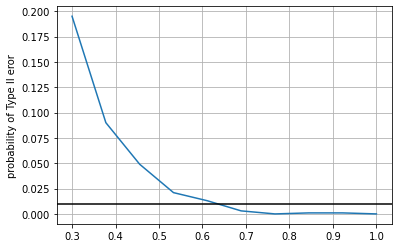

In [55]:
plt.plot(mu_set, 1-p_rejects)
plt.axhline(eps, color="black", label="minimum accepted")
plt.ylabel("probability of Type II eror")
plt.grid();